# Torch Example for Interpolation

In [1]:
import torch

import matplotlib.pyplot as plt

from torch_geometry.manifolds import nSphere, LambdaManifold
from torch_geometry.prob_geodesics import ProbGEORCE, ProbGEORCE_Embedded, ProbGEORCE_Euclidean
from torch_geometry.prob_geodesics import ProbGEORCE_Adaptive, ProbGEORCE_Embedded_Adaptive, ProbGEORCE_Euclidean_Adaptive

from torch_geometry.prob_means import ProbGEORCEFM, ProbGEORCEFM_Embedded, ProbGEORCEFM_Euclidean
from torch_geometry.prob_means import ProbGEORCEFM_Adaptive, ProbGEORCEFM_Embedded_Adaptive, ProbGEORCEFM_Euclidean_Adaptive

## Defining manifold and funcitons

### Define manifold

In [2]:
#Simple Euclidean example
M = nSphere(dim=2)
z0 = -torch.ones(2, dtype=torch.float32)
zN = torch.ones(2, dtype=torch.float32)

### Regularization function

In [3]:
#error to a unit circle
def S_fun(x):

    return (torch.sum(x**2, axis=-1)-1.0)**2


def reg_fun(x):

    return torch.sum(S_fun(x))
    

### Projection function

In [4]:
#dummy projection function
def proj_fun(x):

    return x
    

## ODE Test

In [5]:
Mlambda = LambdaManifold(M=M, S=S_fun, lam=1.0)

In [6]:
test = Mlambda.Exp_ode(-torch.ones(2),10*torch.Tensor([1.0,-0.5]))

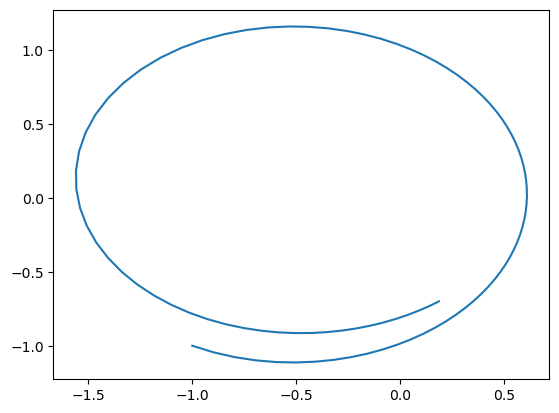

In [7]:
plt.plot(test[:,0], test[:,1])

## Computing geodesics

### ProbGEORCE

In [8]:
ProbGeodesic = ProbGEORCE(M=M,
                          reg_fun=reg_fun,
                          init_fun=None,
                          lam=1.0,
                          N=100,
                          tol=1e-4,
                          max_iter=1000,
                          line_search_params = {'rho': 0.5},
                          device='cpu',
                         )

In [9]:
curve = ProbGeodesic(z0,zN)

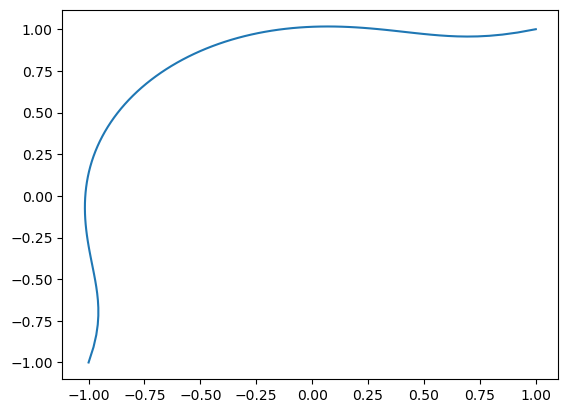

In [10]:
plt.plot(curve[:,0], curve[:,1])

In [11]:
ProbGeodesic = ProbGEORCE_Adaptive(M=M,
                                   reg_fun=reg_fun,
                                   init_fun=None,
                                   lam=1.0,
                                   N=100,
                                   tol=1e-4,
                                   max_iter=1000,
                                   lr_rate=0.1,
                                   beta1=0.5,
                                   beta2=0.5,
                                   eps=1e-8,
                                   device='cpu',
                                  )

In [12]:
curve = ProbGeodesic(z0,zN)

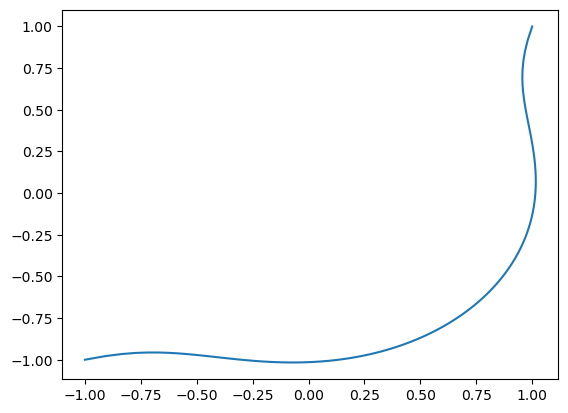

In [13]:
plt.plot(curve[:,0], curve[:,1])

### ProbGEORCE Euclidean

In [14]:
ProbGeodesic = ProbGEORCE_Euclidean(reg_fun=reg_fun,
                                    init_fun=None,
                                    lam=1.0,
                                    N=100,
                                    tol=1e-4,
                                    max_iter=1000,
                                    line_search_params = {'rho': 0.5},
                                    device='cpu',
                                   )

In [15]:
curve = ProbGeodesic(z0,zN)

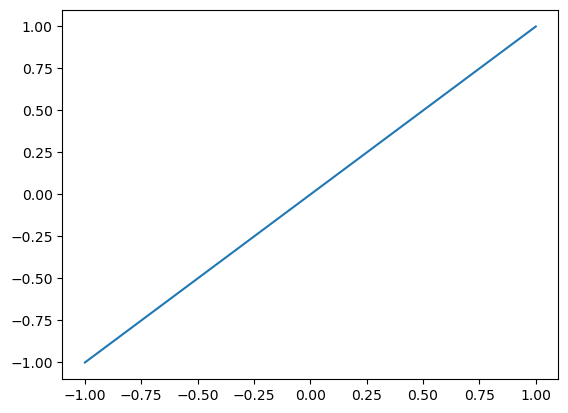

In [16]:
plt.plot(curve[:,0], curve[:,1])

In [17]:
ProbGeodesic = ProbGEORCE_Euclidean_Adaptive(reg_fun=reg_fun,
                                             init_fun=None,
                                             lam=1.0,
                                             N=100,
                                             tol=1e-4,
                                             max_iter=1000,
                                             lr_rate=0.1,
                                             beta1=0.5,
                                             beta2=0.5,
                                             eps=1e-8,
                                             device='cpu',
                                            )

In [18]:
curve = ProbGeodesic(z0,zN)

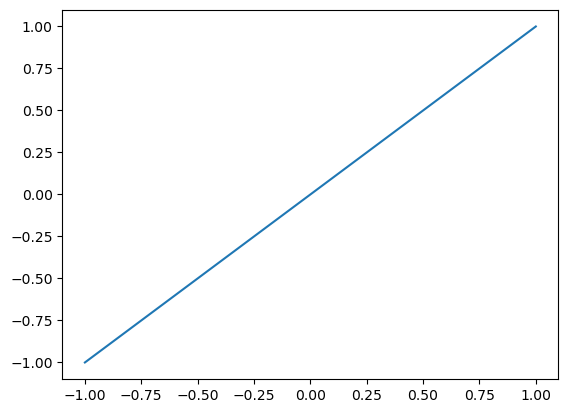

In [19]:
plt.plot(curve[:,0], curve[:,1])

### ProbGEORCE Embedded

In [20]:
def metric_matrix(x):

    if x.ndim == 1:
        return M.G(x)
    else:
        return torch.vmap(M.G)(x)

ProbGeodesic = ProbGEORCE_Embedded(metric_matrix=metric_matrix,
                                   reg_fun=reg_fun,
                                   proj_fun=proj_fun,
                                   init_fun=None,
                                   lam1=1.0,
                                   lam2=1.0,
                                   N=100,
                                   tol=1e-4,
                                   max_iter=1000,
                                   line_search_params = {'rho': 0.5},
                                   device='cpu',
                                  )

In [21]:
curve = ProbGeodesic(z0,zN)

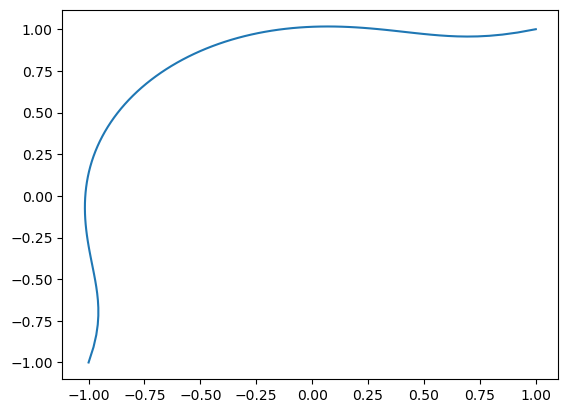

In [22]:
plt.plot(curve[:,0], curve[:,1])

In [23]:
def metric_matrix(x):

    if x.ndim == 1:
        return M.G(x)
    else:
        return torch.vmap(M.G)(x)

ProbGeodesic = ProbGEORCE_Embedded_Adaptive(metric_matrix=metric_matrix,
                                            reg_fun=reg_fun,
                                            proj_fun=proj_fun,
                                            init_fun=None,
                                            lam1=1.0,
                                            lam2=1.0,
                                            N=100,
                                            tol=1e-4,
                                            max_iter=1000,
                                            lr_rate=0.1,
                                            beta1=0.5,
                                            beta2=0.5,
                                            eps=1e-8,
                                            device='cpu',
                                           )

In [24]:
curve = ProbGeodesic(z0,zN)

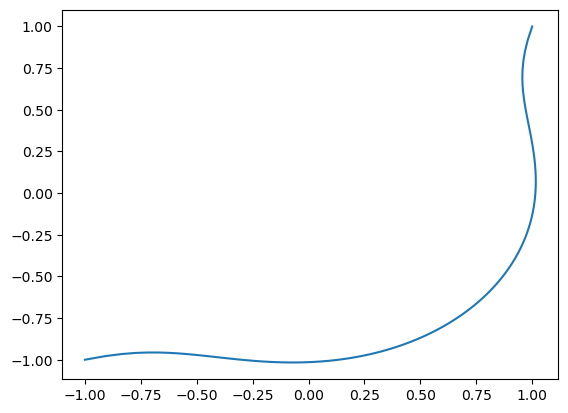

In [25]:
plt.plot(curve[:,0], curve[:,1])

## Computing Means

In [26]:
theta = torch.linspace(0,2*torch.pi,10)
x1 = torch.cos(theta)
x2 = torch.sin(theta)
data = torch.vstack((x1,x2)).T

### ProbGEORCEFM

In [27]:
prob_mean = ProbGEORCEFM(M=M,
                         reg_fun=reg_fun,
                         init_fun=None,
                         lam=0.0,
                         N_grid=100,
                         tol=1e-4,
                         max_iter=1000,
                         line_search_params = {},
                         device="cpu",
                        )

In [28]:
z_mu, zi = prob_mean(data)

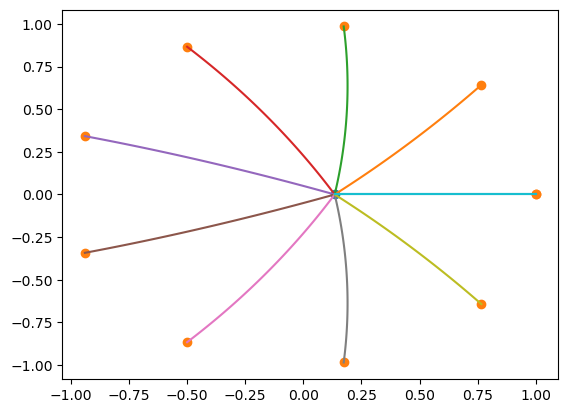

In [29]:
plt.scatter(z_mu[0], z_mu[1])
plt.scatter(data[:,0], data[:,1])
for curve in zi:
    plt.plot(curve[:,0], curve[:,1])

In [30]:
prob_mean_adaptive = ProbGEORCEFM_Adaptive(M=M,
                                  reg_fun=reg_fun,
                                  init_fun=None,
                                  lam=0.0,
                                  N_grid=100,
                                  tol=1e-4,
                                  max_iter=1000,
                                  lr_rate=0.1,
                                  beta1=0.5,
                                  beta2=0.5,
                                  eps=1e-8,
                                           device="cpu",
                                 )

In [31]:
z_mu, zi = prob_mean_adaptive(data)

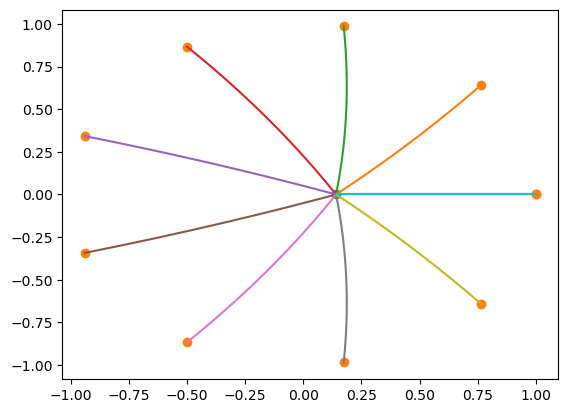

In [32]:
plt.scatter(z_mu[0], z_mu[1])
plt.scatter(data[:,0], data[:,1])
for curve in zi:
    plt.plot(curve[:,0], curve[:,1])

### ProbGEORCEFM Euclidean

In [33]:
prob_mean = ProbGEORCEFM_Euclidean(reg_fun=reg_fun,
                                   init_fun=None,
                                   lam=100.0,
                                   N_grid=100,
                                   tol=1e-4,
                                   max_iter=1000,
                                   line_search_params = {},
                                   device="cpu",
                                  )

In [34]:
z_mu, zi = prob_mean(data)

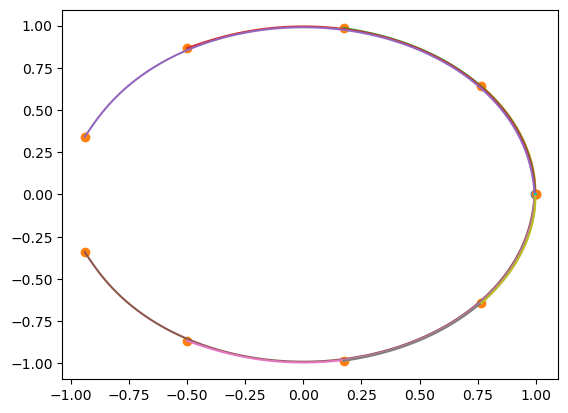

In [35]:
plt.scatter(z_mu[0], z_mu[1])
plt.scatter(data[:,0], data[:,1])
for curve in zi:
    plt.plot(curve[:,0], curve[:,1])

In [36]:
prob_mean_adaptive = ProbGEORCEFM_Euclidean_Adaptive(reg_fun=reg_fun,
                                   init_fun=None,
                                   lam=100.0,
                                   N_grid=100,
                                   tol=1e-4,
                                   max_iter=1000,
                                   lr_rate=0.01,
                                  beta1=0.5,
                                  beta2=0.5,
                                  eps=1e-8,
                                                     device="cpu",
                                  )

In [37]:
z_mu, zi = prob_mean_adaptive(data)

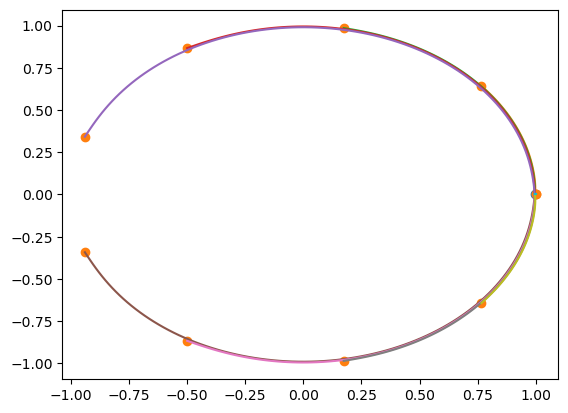

In [38]:
plt.scatter(z_mu[0], z_mu[1])
plt.scatter(data[:,0], data[:,1])
for curve in zi:
    plt.plot(curve[:,0], curve[:,1])

### ProbGEORCEFM Embedded

In [39]:
prob_mean = ProbGEORCEFM_Embedded(metric_matrix=M.G,
                                  proj_fun=proj_fun,
                                  reg_fun=reg_fun,
                                   init_fun=None,
                                   lam1=10.0,
                                  lam2=10.0,
                                   N_grid=100,
                                   tol=1e-4,
                                   max_iter=1000,
                                   line_search_params = {},
                                  device="cpu",
                                  )

In [40]:
z_mu, zi = prob_mean(data)

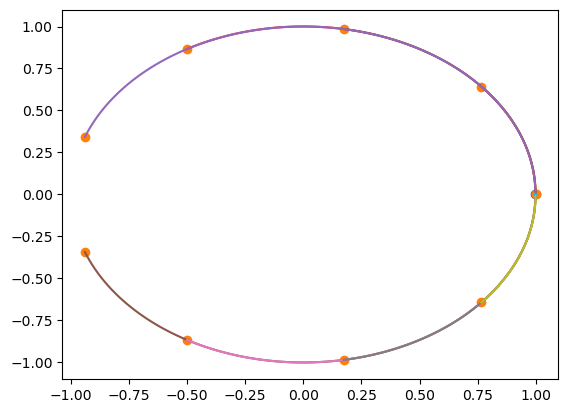

In [41]:
plt.scatter(z_mu[0], z_mu[1])
plt.scatter(data[:,0], data[:,1])
for curve in zi:
    plt.plot(curve[:,0], curve[:,1])

In [42]:
prob_mean_adaptive = ProbGEORCEFM_Embedded_Adaptive(metric_matrix=M.G,
                                  proj_fun=proj_fun,
                                  reg_fun=reg_fun,
                                  init_fun=None,
                                  lam1=1.0,
                                  lam2=1.0,
                                  N_grid=100,
                                  tol=1e-4,
                                  max_iter=1000,
                                  lr_rate=0.1,
                                  beta1=0.5,
                                  beta2=0.5,
                                  eps=1e-8,
                                                    device="cpu",
                                 )

In [43]:
z_mu, zi = prob_mean_adaptive(data)

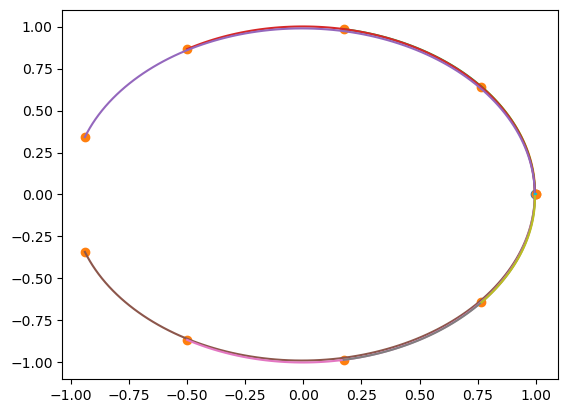

In [44]:
plt.scatter(z_mu[0], z_mu[1])
plt.scatter(data[:,0], data[:,1])
for curve in zi:
    plt.plot(curve[:,0], curve[:,1])